In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IR/IR-assignment-2-data.txt',sep=' ', header=None)

Q2_1

In [ ]:
df2 = df[df[1] == "qid:4"]

In [ ]:
print(df2)

     0      1    2    3    4    5    6           7    8           9    ...  \
0      0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
1      0  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
2      0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
3      0  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
4      1  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
..   ...    ...  ...  ...  ...  ...  ...         ...  ...         ...  ...   
98     0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
99     1  qid:4  1:3  2:0  3:3  4:2  5:3         6:1  7:0         8:1  ...   
100    2  qid:4  1:2  2:0  3:2  4:0  5:2  6:0.666667  7:0  8:0.666667  ...   
101    1  qid:4  1:2  2:0  3:2  4:0  5:2  6:0.666667  7:0  8:0.666667  ...   
102    0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   

          129     130        131        132      133      134  

Q2_2

In [ ]:
size_of_labels = []
relevance = df2[0].unique()
number_of_files = 1
print(relevance)
for i in relevance:
  size_label = 0
  for j in df2[0]:
    if j == i:
      size_label += 1
  print(size_label)
  number_of_files *= math.factorial(size_label)
  size_of_labels.append(size_label)

final = df2.sort_values(by = 0, ascending = False)
final = final.reset_index(drop = True)
print("number of files on rearranging the query-url pairs in order of max DCG", number_of_files)  
final.to_csv('Q2_2.csv')

[0 1 3 2]
59
26
1
17
number of files on rearranging the query-url pairs in order of max DCG 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


Q2_3

In [ ]:
def DCG(df, n):
  result = 0;
  for i in range(n):
    result = result + (pow(2, df[0][i]) - 1)/(np.log2(i+2))
  return result

In [ ]:
print("nDCG at 50:",DCG(df2,50)/DCG(final,50))
print("nDCG for whole dataset:",DCG(df2,len(df2))/DCG(final,len(df2)))

nDCG at 50: 0.35612494416255847
nDCG for whole dataset: 0.5784691984582591


Q2_4

In [ ]:
files = open(r'/content/drive/MyDrive/IR/IR-assignment-2-data.txt',encoding="unicode_escape")
file_val = files.readlines()

In [ ]:
feedbk=[]
fture_score=[]
for entry in file_val:
    if entry[entry.find("qid:")+4:entry.find("1:")-1]=="4":
        loc=entry.find("75:")
        loc1=entry.find("76:")
        feedbk.append(int(entry[0]))
        fture_score.append(float(entry[loc+3:loc1-1]))
        if float(entry[loc+3:loc1-1])==0.0:
            print(entry)

In [ ]:
relevance_label = []
feature_75 = []
for entry in file_val:
  i = entry.find("qid:")+4
  j = entry.find("1:")-1
  if entry[i:j]=="4":
    x = float(entry[entry.find("75:")+3:entry.find("76:")-1])
    relevance_label.append(int(entry[0]))
    feature_75.append(x)

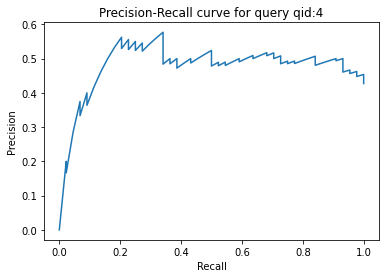

In [ ]:
final_rel = [x for _,x in sorted(zip(feature_75,relevance_label),reverse=True)]
precision = []
recall = []
relevant_no = 0
for i in range(len(final_rel)):
  if final_rel[i] != 0:
    relevant_no += 1
total = 0
cur_rel = 0
for i in range(len(final_rel)):
  total += 1
  if final_rel[i] != 0:
    cur_rel += 1
  prec = cur_rel/total
  rec = cur_rel/relevant_no
  precision.append(prec)
  recall.append(rec)
plt.title("Precision-Recall curve for query qid:4")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.plot(recall,precision)
plt.show()   